# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Norman Dwi Febrio
- Email: mumpungaji54@gmail.com
- Id Dicoding: normanfebrio

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

pd.set_option("display.max_column", 50)

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv("data/data.csv", sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Sebuah dataset yang dibuat oleh institusi perguruan tinggi (didapatkan dari beberapa database terpisah) yang berkaitan dengan terdaftarnya siswa-siswa dalam berbagai program sarjana, seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Dataset ini mencakup informasi yang diketahui pada saat pendaftaran siswa (jalur akademis, demografi, dan faktor sosial-ekonomi) serta kinerja akademis siswa pada akhir semester pertama dan kedua. Data ini digunakan untuk membangun model klasifikasi untuk memprediksi siswa yang akan drop out dan keberhasilan akademis mereka.

Dataset ini terdiri dari 37 fitur dan 4424 baris data. Berikut adalah penjelasan untuk masing-masing fitur.

| Column name | Description |
| --- | --- |
|Marital status | Status pernikahan siswa. (kategorikal) 1 – Lajang; 2 – Nikah; 3 – Duda; 4 – Cerai; 5 –Bersama tanpa ikatan resmi; 6 – Terpisah secara resmi |
| Application mode | Metode masuk perguruan tinggi yang digunakan oleh siswa. (kategorikal) 1 - Tahap pertama - kontingen umum; 2 - Peraturan No. 612/93; 5 - Tahap pertama - kontingen khusus (Pulau Azores); 7 - Pemegang kursus tinggi lainnya; 10 - Peraturan No. 854-B/99; 15 - Mahasiswa internasional (sarjana); 16 - Tahap pertama - kontingen khusus (Pulau Madeira); 17 - Tahap kedua - kontingen umum; 18 - Tahap ketiga - kontingen umum; 26 - Peraturan No. 533-A/99, item b2) (Rencana Berbeda); 27 - Peraturan No. 533-A/99, item b3 (Lembaga Lain); 39 - Berusia di atas 23 tahun; 42 - Transfer; 43 - Perubahan jurusan; 44 - Pemegang diploma spesialisasi teknologi; 51 - Perubahan institusi/jurusan; 53 - Pemegang diploma siklus pendek; 57 - Perubahan institusi/jurusan (Internasional)|
|Application order | Urutan di mana siswa mendaftar (Numerikal) Application order (Antara 0 - pilihan pertama; dan 9 pilihan terakhir) |
|Course | Mata kuliah yang diambil oleh siswa. (Kategoris); 33 - Teknologi Produksi Bahan Bakar Nabati; 171 - Desain Animasi dan Multimedia; 8014 - Layanan Sosial (kehadiran malam); 9003 - Agronomi; 9070 - Desain Komunikasi; 9085 - Perawatan Hewan; 9119 - Teknik Informatika; 9130 - Peternakan Kuda; 9147 - Manajemen; 9238 - Layanan Sosial; 9254 - Pariwisata; 9500 - Keperawatan; 9556 - Kesehatan Gigi; 9670 - Manajemen Periklanan dan Pemasaran; 9773 - Jurnalisme dan Komunikasi; 9853 - Pendidikan Dasar; 9991 - Manajemen (kehadiran malam)|
|Daytime/evening attendance | Apakah siswa menghadiri kelas siang atau malam. (Kategoris) 1 - siang; 0 - malam |
|Previous qualification| Kualifikasi yang diperoleh oleh siswa sebelum mendaftar di perguruan tinggi. (Kategoris) 1 - Pendidikan Sekunder; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi pendidikan tinggi; 9 - Tahun ke-12 sekolah - tidak selesai; 10 - Tahun ke-11 sekolah - tidak selesai; 12 - Lainnya - Tahun ke-11 sekolah; 14 - Tahun ke-10 sekolah; 15 - Tahun ke-10 sekolah - tidak selesai; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2) |
|Previous qualification (grade) | Nilai dari kualifikasi sebelumnya (antara 0 dan 200) |
|Nacionality |  Kebangsaan siswa. (Kategoris) 1 - Portugis; 2 - Jerman; 6 - Spanyol; 11 - Italia; 13 - Belanda; 14 - Inggris; 17 - Lithuania; 21 - Angola; 22 - Cape Verde; 24 - Guinea; 25 - Mozambik; 26 - Santomean; 32 - Turki; 41 - Brasil; 62 - Rumania; 100 - Moldova (Republik); 101 - Meksiko; 103 - Ukraina; 105 - Rusia; 108 - Kuba; 109 - Kolombia |
|Mother's qualification | Kualifikasi ibu siswa. (Kategoris) 1 - Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi Pendidikan Tinggi; 9 - Tahun ke-12 sekolah - Tidak Selesai; 10 - Tahun ke-11 sekolah - Tidak Selesai; 11 - Tahun ke-7 (Lama); 12 - Lainnya - Tahun ke-11 sekolah; 14 - Tahun ke-10 sekolah; 18 - Kursus Perdagangan Umum; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 22 - Kursus Teknis-Profesional; 26 - Tahun ke-7 sekolah; 27 - Siklus 2 kursus SMA umum; 29 - Tahun ke-9 sekolah - Tidak Selesai; 30 - Tahun ke-8 sekolah; 34 - Tidak diketahui; 35 - Tidak bisa membaca atau menulis; 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah; 37 - Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 41 - Kursus Studi Tinggi Khusus; 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2); 44 - Pendidikan Tinggi - gelar doktor (Siklus 3) |
|Father's qualification | Kualifikasi ayah siswa. (Kategoris) 1 - Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi Pendidikan Tinggi; 9 - Tahun ke-12 sekolah - Tidak Selesai; 10 - Tahun ke-11 sekolah - Tidak Selesai; 11 - Tahun ke-7 (Lama); 12 - Lainnya - Tahun ke-11 sekolah; 13 - Kursus SMA komplementer tahun ke-2; 14 - Tahun ke-10 sekolah; 18 - Kursus Perdagangan Umum; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 20 - Kursus SMA Komplementer; 22 - Kursus Teknis-Profesional; 25 - Kursus SMA Komplementer - tidak selesai; 26 - Tahun ke-7 sekolah; 27 - Siklus 2 kursus SMA umum; 29 - Tahun ke-9 sekolah - Tidak Selesai; 30 - Tahun ke-8 sekolah; 31 - Umum Administrasi dan Kursus Perdagangan; 33 - Akuntansi Tambahan dan Administrasi; 34 - Tidak diketahui; 35 - Tidak bisa membaca atau menulis; 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah; 37 - Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 41 - Kursus Studi Tinggi Khusus; 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2); 44 - Pendidikan Tinggi - gelar doktor (Siklus 3) |
| Mother's occupation | Pekerjaan ibu siswa. (Kategoris) 0 - Siswa 1 - Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf Administrasi 5 - Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual 6 - Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Tenaga Kerja Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lainnya 99 - (kosong) 122 - Profesional Kesehatan 123 - Guru 125 - Spesialis dalam teknologi informasi dan komunikasi (TIK) 131 - Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik 132 - Teknisi dan Profesional, tingkat menengah dari kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya 141 - Pekerja kantor, sekretaris umum, dan operator pengolahan data 143 - Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi 144 - Staf dukungan administratif lainnya 151 - Pekerja layanan personal 152 - Penjual 153 - Pekerja perawatan pribadi dan sejenisnya 171 - Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik 173 - Tenaga kerja terampil dalam percetakan, pembuatan instrumen presisi, perhiasan, pengrajin, dan sejenisnya 175 - Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya 191 - Pekerja pembersihan 192 - Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan 193 - Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi 194 - Asisten persiapan makanan |
| Father's occupation | Pekerjaan ayah siswa. (Kategoris) 0 - Siswa 1 - Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf Administrasi 5 - Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual 6 - Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Tenaga Kerja Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lainnya 99 - (kosong) 101 - Perwira Angkatan Bersenjata 102 - Sersan Angkatan Bersenjata 103 - Personel Angkatan Bersenjata Lainnya 112 - Direktur Layanan Administratif dan Komersial 114 - Direktur Hotel, Restoran, Perdagangan, dan Layanan Lainnya 121 - Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait 122 - Profesional Kesehatan 123 - Guru 124 - Spesialis dalam keuangan, akuntansi, organisasi administratif, hubungan publik, dan komersial 131 - Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik 132 - Teknisi dan Profesional, tingkat menengah dari kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya 135 - Teknisi Teknologi Informasi dan Komunikasi 141 - Pekerja kantor, sekretaris umum, dan operator pengolahan data 143 - Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi 144 - Staf dukungan administratif lainnya 151 - Pekerja layanan personal 152 - Penjual 153 - Pekerja perawatan pribadi dan sejenisnya 154 - Personil layanan perlindungan dan keamanan 161 - Petani berorientasi pasar dan tenaga kerja pertanian terampil dan produksi hewan 163 - Petani, pemelihara hewan, nelayan, pemburu, dan pengumpul, untuk pemenuhan kebutuhan 171 - Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik 172 - Tenaga kerja terampil dalam logamurgi, permesinan logam, dan sejenisnya 174 - Tenaga kerja terampil dalam listrik dan elektronika 175 - Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya 181 - Operator pabrik dan mesin tetap 182 - Pekerja perakitan 183 - Pengemudi kendaraan dan operator peralatan mobile 192 - Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan 193 - Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi 194 - Asisten persiapan makanan 195 - Pedagang jalanan (kecuali makanan) dan penyedia layanan jalanan |
| Admission grade | Nilai masuk (antara 0 dan 200) |
| Displaced | Apakah siswa adalah orang yang terdampak. (Kategoris) 1 – ya 0 – tidak |
| Educational special needs | Apakah siswa memiliki kebutuhan pendidikan khusus. (Kategoris) 1 – ya 0 – tidak |
| Debtor | Apakah siswa adalah peminjam. (Kategoris) 1 – ya 0 – tidak |
| Tuition fees up to date | Apakah biaya kuliah siswa sudah terbayar. (Kategoris) 1 – ya 0 – tidak |
| Gender | Jenis kelamin siswa. (Kategoris) 1 – laki-laki 0 – perempuan |
| Scholarship holder | Apakah siswa adalah penerima beasiswa. (Kategoris) 1 – ya 0 – tidak |
| Age at enrollment | Usia siswa pada saat pendaftaran. (Numerik) |
| International | Apakah siswa adalah mahasiswa internasional. (Kategoris) 1 – ya 0 – tidak |
| Curricular units 1st sem (credited) | Jumlah unit kurikuler yang diakui oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (enrolled) | Jumlah unit kurikuler yang diambil oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (evaluations) | Jumlah unit kurikuler yang dievaluasi oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (approved) | Jumlah unit kurikuler yang disetujui oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (grade) | Jumlah unit kurikuler yang dinilai oleh siswa dan diterima pada semester pertama. (Numerik) |
| Curricular units 1st sem (without evaluations) | Jumlah unit kurikuler yang diambil oleh siswa pada semester pertama tanpa dinilai. (Numerik) |
| Curricular units 2nd sem (credited) | Jumlah unit kurikuler yang diakui oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (enrolled) | Jumlah unit kurikuler yang diambil oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (evaluations) | Jumlah unit kurikuler yang dievaluasi oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (approved) | Jumlah unit kurikuler yang disetujui atau diterima oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (grade) | Jumlah unit kurikuler yang dinilai dan diterima oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (without evaluations) | Jumlah unit kurikuler yang diambil oleh siswa pada semester kedua tanpa dinilai. (Numerik) |
| Unemployment_rate | Tingkat pengangguran, yakni persentase dari jumlah orang yang tidak memiliki pekerjaan dalam populasi tertentu. (Numerik) |
| Inflation_rate | Tingkat inflasi, yang mengukur persentase kenaikan harga barang dan jasa dalam suatu periode waktu. (Numerik) |
| GDP | Gross Domestic Product (PDB), yakni nilai total semua barang dan jasa yang dihasilkan oleh suatu negara dalam satu tahun. (Numerik) |
| Status | Apakah mahasiswa tersebut _Dropout_, _Graduate_, ataupun _Enrolled_ (kategorikal) |


## Data Cleaning

In [3]:
numerical_features = [
    "Application_order","Previous_qualification_grade","Admission_grade",
    "Age_at_enrollment","Curricular_units_1st_sem_credited","Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations","Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade","Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited","Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations","Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade","Curricular_units_2nd_sem_without_evaluations",
    "Unemployment_rate","Inflation_rate","GDP"
]

categorical_features = [cat_feature for cat_feature in df.columns[:-1] if cat_feature not in numerical_features]
categorical_features

['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df[numerical_features].describe(include="all")

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
marital_status_dict = {
    1: "Lajang",
    2: "Nikah",
    3: "Duda",
    4: "Cerai",
    5: "Bersama tanpa ikatan resmi",
    6: "Terpisah secara resmi"
}


application_mode_dict = {
    1: "Tahap pertama - kontingen umum",
    2: "Peraturan No. 612/93",
    5: "Tahap pertama - kontingen khusus (Pulau Azores)",
    7: "Pemegang kursus tinggi lainnya",
    10: "Peraturan No. 854-B/99",
    15: "Mahasiswa internasional (sarjana)",
    16: "Tahap pertama - kontingen khusus (Pulau Madeira)",
    17: "Tahap kedua - kontingen umum",
    18: "Tahap ketiga - kontingen umum",
    26: "Peraturan No. 533-A/99, item b2) (Rencana Berbeda)",
    27: "Peraturan No. 533-A/99, item b3 (Lembaga Lain)",
    39: "Berusia di atas 23 tahun",
    42: "Transfer",
    43: "Perubahan jurusan",
    44: "Pemegang diploma spesialisasi teknologi",
    51: "Perubahan institusi/jurusan",
    53: "Pemegang diploma siklus pendek",
    57: "Perubahan institusi/jurusan (Internasional)"
}

course_dict = {
    33: "Teknologi Produksi Bahan Bakar Nabati",
    171: "Desain Animasi dan Multimedia",
    8014: "Layanan Sosial (kehadiran malam)",
    9003: "Agronomi",
    9070: "Desain Komunikasi",
    9085: "Perawatan Hewan",
    9119: "Teknik Informatika",
    9130: "Peternakan Kuda",
    9147: "Manajemen",
    9238: "Layanan Sosial",
    9254: "Pariwisata",
    9500: "Keperawatan",
    9556: "Kesehatan Gigi",
    9670: "Manajemen Periklanan dan Pemasaran",
    9773: "Jurnalisme dan Komunikasi",
    9853: "Pendidikan Dasar",
    9991: "Manajemen (kehadiran malam)"
}

daytime_evening_attendance_dict = {0:"Malam", 1:"Siang"}

prev_qualification_dict = {
    1: "Pendidikan Sekunder",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi pendidikan tinggi",
    9: "Tahun ke-12 sekolah - tidak selesai",
    10: "Tahun ke-11 sekolah - tidak selesai",
    12: "Lainnya - Tahun ke-11 sekolah",
    14: "Tahun ke-10 sekolah",
    15: "Tahun ke-10 sekolah - tidak selesai",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)"
}

nationality_dict = {
    1: "Portugis",
    2: "Jerman",
    6: "Spanyol",
    11: "Italia",
    13: "Belanda",
    14: "Inggris",
    17: "Lithuania",
    21: "Angola",
    22: "Cape Verde",
    24: "Guinea",
    25: "Mozambik",
    26: "Santomean",
    32: "Turki",
    41: "Brasil",
    62: "Rumania",
    100: "Moldova (Republik)",
    101: "Meksiko",
    103: "Ukraina",
    105: "Rusia",
    108: "Kuba",
    109: "Kolombia"
}

mother_qualification_dict = {
    1: "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi Pendidikan Tinggi",
    9: "Tahun ke-12 sekolah - Tidak Selesai",
    10: "Tahun ke-11 sekolah - Tidak Selesai",
    11: "Tahun ke-7 (Lama)",
    12: "Lainnya - Tahun ke-11 sekolah",
    14: "Tahun ke-10 sekolah",
    18: "Kursus Perdagangan Umum",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    22: "Kursus Teknis-Profesional",
    26: "Tahun ke-7 sekolah",
    27: "Siklus 2 kursus SMA umum",
    29: "Tahun ke-9 sekolah - Tidak Selesai",
    30: "Tahun ke-8 sekolah",
    34: "Tidak diketahui",
    35: "Tidak bisa membaca atau menulis",
    36: "Bisa membaca tanpa memiliki tahun ke-4 sekolah",
    37: "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    41: "Kursus Studi Tinggi Khusus",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)",
    44: "Pendidikan Tinggi - gelar doktor (Siklus 3)"
}

father_qualification_dict = {
    1: "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara",
    2: "Pendidikan Tinggi - gelar sarjana",
    3: "Pendidikan Tinggi - gelar",
    4: "Pendidikan Tinggi - gelar magister",
    5: "Pendidikan Tinggi - gelar doktor",
    6: "Frekuensi Pendidikan Tinggi",
    9: "Tahun ke-12 sekolah - Tidak Selesai",
    10: "Tahun ke-11 sekolah - Tidak Selesai",
    11: "Tahun ke-7 (Lama)",
    12: "Lainnya - Tahun ke-11 sekolah",
    13: "Kursus SMA komplementer tahun ke-2",
    14: "Tahun ke-10 sekolah",
    18: "Kursus Perdagangan Umum",
    19: "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara",
    20: "Kursus SMA Komplementer",
    22: "Kursus Teknis-Profesional",
    25: "Kursus SMA Komplementer - tidak selesai",
    26: "Tahun ke-7 sekolah",
    27: "Siklus 2 kursus SMA umum",
    29: "Tahun ke-9 sekolah - Tidak Selesai",
    30: "Tahun ke-8 sekolah",
    31: "Umum Administrasi dan Kursus Perdagangan",
    33: "Akuntansi Tambahan dan Administrasi",
    34: "Tidak diketahui",
    35: "Tidak bisa membaca atau menulis",
    36: "Bisa membaca tanpa memiliki tahun ke-4 sekolah",
    37: "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara",
    38: "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara",
    39: "Kursus Spesialisasi Teknologi",
    40: "Pendidikan Tinggi - gelar (Siklus 1)",
    41: "Kursus Studi Tinggi Khusus",
    42: "Kursus Teknis Tinggi Profesional",
    43: "Pendidikan Tinggi - gelar magister (Siklus 2)",
    44: "Pendidikan Tinggi - gelar doktor (Siklus 3)"
}

mother_occupation_dict = {
    0: "Siswa",
    1: "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur",
    2: "Spesialis dalam Aktivitas Intelektual dan Ilmiah",
    3: "Teknisi dan Profesi Tingkat Menengah",
    4: "Staf Administrasi",
    5: "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual",
    6: "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan",
    7: "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin",
    8: "Operator Pemasangan dan Mesin serta Pekerja Perakitan",
    9: "Tenaga Kerja Terampil",
    10: "Profesi Angkatan Bersenjata",
    90: "Situasi Lainnya",
    99: "(kosong)",
    122: "Profesional Kesehatan",
    123: "Guru",
    125: "Spesialis dalam teknologi informasi dan komunikasi (TIK)",
    131: "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik",
    132: "Teknisi dan Profesional, tingkat menengah dari kesehatan",
    134: "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya",
    141: "Pekerja kantor, sekretaris umum, dan operator pengolahan data",
    143: "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi",
    144: "Staf dukungan administratif lainnya",
    151: "Pekerja layanan personal",
    152: "Penjual",
    153: "Pekerja perawatan pribadi dan sejenisnya",
    171: "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik",
    173: "Tenaga kerja terampil dalam percetakan, pembuatan instrumen presisi, perhiasan, pengrajin, dan sejenisnya",
    175: "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya",
    191: "Pekerja pembersihan",
    192: "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan",
    193: "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi",
    194: "Asisten persiapan makanan"
}

father_occupation_dict = {
    0: "Siswa",
    1: "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur",
    2: "Spesialis dalam Aktivitas Intelektual dan Ilmiah",
    3: "Teknisi dan Profesi Tingkat Menengah",
    4: "Staf Administrasi",
    5: "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual",
    6: "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan",
    7: "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin",
    8: "Operator Pemasangan dan Mesin serta Pekerja Perakitan",
    9: "Tenaga Kerja Terampil",
    10: "Profesi Angkatan Bersenjata",
    90: "Situasi Lainnya",
    99: "(kosong)",
    101: "Perwira Angkatan Bersenjata",
    102: "Sersan Angkatan Bersenjata",
    103: "Personel Angkatan Bersenjata Lainnya",
    112: "Direktur Layanan Administratif dan Komersial",
    114: "Direktur Hotel, Restoran, Perdagangan, dan Layanan Lainnya",
    121: "Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait",
    122: "Profesional Kesehatan",
    123: "Guru",
    124: "Spesialis dalam keuangan, akuntansi, organisasi administratif, hubungan publik, dan komersial",
    131: "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik",
    132: "Teknisi dan Profesional, tingkat menengah dari kesehatan",
    134: "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya",
    135: "Teknisi Teknologi Informasi dan Komunikasi",
    141: "Pekerja kantor, sekretaris umum, dan operator pengolahan data",
    143: "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi",
    144: "Staf dukungan administratif lainnya",
    151: "Pekerja layanan personal",
    152: "Penjual",
    153: "Pekerja perawatan pribadi dan sejenisnya",
    154: "Personil layanan perlindungan dan keamanan",
    161: "Petani berorientasi pasar dan tenaga kerja pertanian terampil dan produksi hewan",
    163: "Petani, pemelihara hewan, nelayan, pemburu, dan pengumpul, untuk pemenuhan kebutuhan",
    171: "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik",
    172: "Tenaga kerja terampil dalam logamurgi, permesinan logam, dan sejenisnya",
    174: "Tenaga kerja terampil dalam listrik dan elektronika",
    175: "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya",
    181: "Operator pabrik dan mesin tetap",
    182: "Pekerja perakitan",
    183: "Pengemudi kendaraan dan operator peralatan mobile",
    192: "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan",
    193: "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi",
    194: "Asisten persiapan makanan",
    195: "Pedagang jalanan (kecuali makanan) dan penyedia layanan jalanan"
}

displaced_dict = {0:"Tidak",1:"Ya"}

educational_special_needs_dict = {0:"Tidak",1:"Ya"}

debtor_dict = {0:"Tidak",1:"Ya"}

tuition_fees_dict = {0:"Tidak",1:"Ya"}

gender_dict = {0:"Perempuan",1:"Laki-laki"}

scholarship_holder_dict = {0:"Tidak",1:"Ya"}

international_dict = {0:"Tidak",1:"Ya"}

In [7]:
dict_list = [marital_status_dict, application_mode_dict, course_dict,
            daytime_evening_attendance_dict, prev_qualification_dict,
            nationality_dict, mother_qualification_dict, father_qualification_dict,
            mother_occupation_dict, father_occupation_dict, displaced_dict,
            educational_special_needs_dict, debtor_dict, tuition_fees_dict,
            gender_dict, scholarship_holder_dict, international_dict]

In [8]:
def val_decoder(df, features, dicts):
    new_df = df.copy()
    
    for feature, dict_ in zip(features, dicts):
        new_df[feature] = new_df[feature].replace(dict_)
        
    return new_df

In [9]:
new_df = val_decoder(df, categorical_features, dict_list)
new_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Lajang,Tahap kedua - kontingen umum,5,Desain Animasi dan Multimedia,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) a...,Lainnya - Tahun ke-11 sekolah,"Pelayanan Personal, Pekerja Keamanan dan Kesel...",Tenaga Kerja Terampil,127.3,Ya,Tidak,Tidak,Ya,Laki-laki,Tidak,20,Tidak,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Lajang,Mahasiswa internasional (sarjana),1,Pariwisata,Siang,Pendidikan Sekunder,160.0,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Pendidikan Tinggi - gelar,Teknisi dan Profesi Tingkat Menengah,Teknisi dan Profesi Tingkat Menengah,142.5,Ya,Tidak,Tidak,Tidak,Laki-laki,Tidak,19,Tidak,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Lajang,Tahap pertama - kontingen umum,5,Desain Komunikasi,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,124.8,Ya,Tidak,Tidak,Tidak,Laki-laki,Tidak,19,Tidak,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Lajang,Tahap kedua - kontingen umum,2,Jurnalisme dan Komunikasi,Siang,Pendidikan Sekunder,122.0,Portugis,Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) ata...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,"Pelayanan Personal, Pekerja Keamanan dan Kesel...",Teknisi dan Profesi Tingkat Menengah,119.6,Ya,Tidak,Tidak,Ya,Perempuan,Tidak,20,Tidak,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Nikah,Berusia di atas 23 tahun,1,Layanan Sosial (kehadiran malam),Malam,Pendidikan Sekunder,100.0,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) ata...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,141.5,Tidak,Tidak,Tidak,Ya,Perempuan,Tidak,45,Tidak,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
new_df["Mothers_occupation"].unique()

array(['Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual',
       'Teknisi dan Profesi Tingkat Menengah', 'Tenaga Kerja Terampil',
       'Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin',
       'Staf Administrasi',
       'Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur',
       'Spesialis dalam teknologi informasi dan komunikasi (TIK)',
       'Siswa',
       'Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan',
       'Spesialis dalam Aktivitas Intelektual dan Ilmiah',
       'Situasi Lainnya',
       'Operator Pemasangan dan Mesin serta Pekerja Perakitan',
       'Pekerja kantor, sekretaris umum, dan operator pengolahan data',
       'Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya',
       '(kosong)', 'Pekerja pembersihan', 'Pekerja layanan personal',
       'Asisten persiapan makanan',
       'Tenaga kerja tidak terampil di pertanian, produ

In [11]:
new_df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,NaN,17,2,17,NaN,21,29,34,32,46,NaN,2,2,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Lajang,Tahap pertama - kontingen umum,NaN,Keperawatan,Siang,Pendidikan Sekunder,NaN,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,NaN,Ya,Tidak,Tidak,Ya,Perempuan,Tidak,NaN,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,NaN,766,3941,3717,NaN,4314,1069,1209,1577,1010,NaN,2426,4373,3921,3896,2868,3325,NaN,4314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,1.727848,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,NaN,NaN,126.978119,NaN,NaN,NaN,NaN,NaN,NaN,23.265145,NaN,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,1.313793,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,NaN,NaN,14.482001,NaN,NaN,NaN,NaN,NaN,NaN,7.587816,NaN,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,NaN,117.900000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,NaN,NaN,126.100000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,134.800000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [12]:
new_df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Terlihat bahwa persebaran data pada variabel target (`Status`) tidak seimbang. Hal ini tentu akan membuat model menjadi bias karena lebih banyak belajar pada salah satu data namun kurang pada data lainnya. Oleh karena itu, akan dilakukan teknik **Oversampling** dan **Undersampling** pada data.

## Exploratory Data Analysis

In [13]:
def categorical_plot(df, features, segment_type=False):
    height = len(features) * 4
    
    fig, ax = plt.subplots(ncols=1, nrows=len(features), figsize=(14, height))
    for i, feature in enumerate(features):
        if segment_type:
            sns.countplot(data=df, y=feature, hue=segment_type, ax=ax[i])
            ax[i].set_title(f"{segment_type} by {feature}")
        else:
            sns.countplot(data=df, y=feature, ax=ax[i])
            ax[i].set_title(f"{feature}")
    plt.tight_layout()
    plt.show()

def numerical_dis_plot(df, features, segment_type=False):
    height = len(features) * 4
    
    fig, ax = plt.subplots(ncols=1, nrows=len(features), figsize=(10, height))
    for i, feature in enumerate(features):
        if segment_type:
            sns.boxplot(data=df, y=feature, hue=segment_type, ax=ax[i])
            ax[i].set_title(f"{segment_type} by {feature}")
        else:
            sns.boxplot(data=df, y=feature, ax=ax[i])
            ax[i].set_title(f"{feature}")
    plt.tight_layout()
    plt.show()

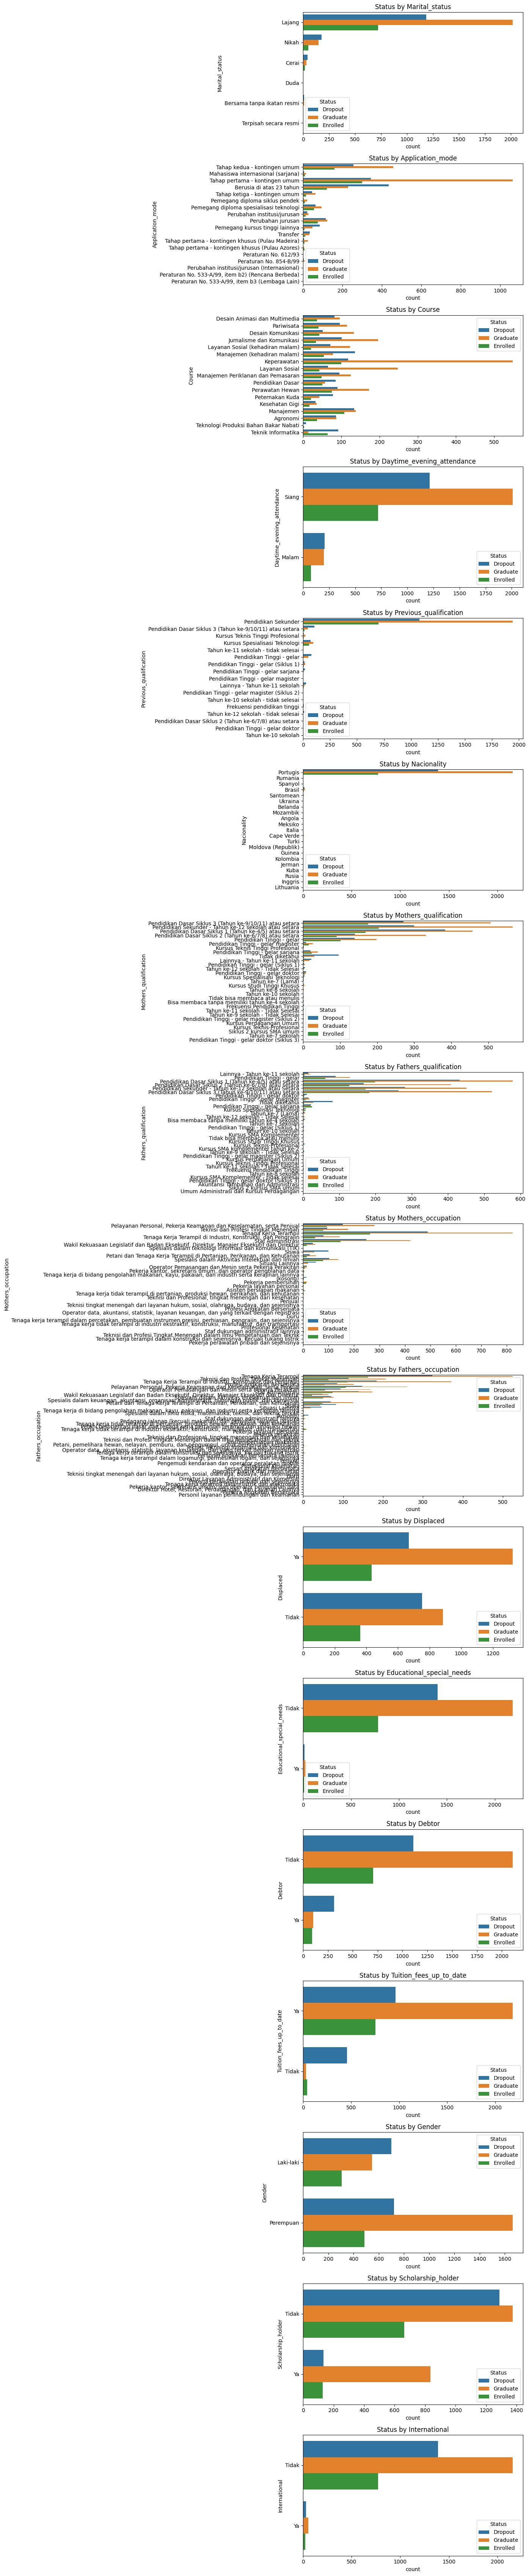

In [14]:
categorical_plot(new_df, categorical_features, segment_type="Status")

Terdapat terlalu banyak kategori pada fitur `Previous_qualification`, `Mothers_qualification`, `Fathers_qualification`, `Mohters_occupation`, dan `Fathers_occupation`. Untuk lebih memudahkannya lagi dalam melakukan analisisnya, fitur-fitur ini akan disederhanakan lagi dengan cara mengelompokkan kategori-kategori yang ada ke dalam kelompok atau bidang tertentu.

Kemudian untuk fitur `Nacionality`, fitur ini sebenarnya memliki informasi yang sama dengan fitur `International`, yang mana ketika siswa berasal dari Portugis maka nilai pada fitur _international_-nya adalah "Tidak". Jika siswa berasal dari luar Portugis, maka nilai pada fitur _international_-nya adalah "Ya". Oleh karena itu, fitur ini tidak akan digunakan agar tidak terjadi _data redundancy_ (data yang berulang).

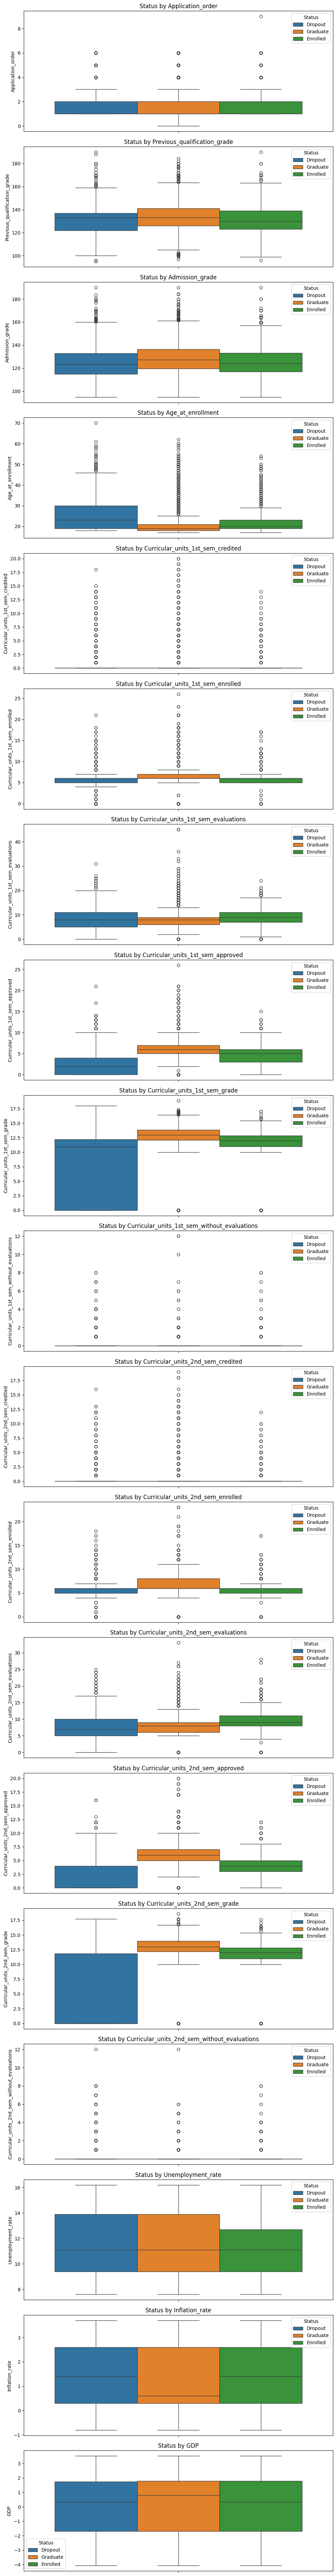

In [15]:
numerical_dis_plot(new_df, numerical_features, segment_type="Status")


- Siswa yang lulus memiliki nilai yang cenderung lebih baik daripada siswa yang _dropout_.
- Pada fitur `Application_order`, `Previous_qualification_grade`, `Unemployment_rate`, `Inflation_rate`, dan `GDP`, persebaran data yang dimiliki oleh tiap segmen cenderung sama. Hal ini tentu tidak akan terlalu banyak memberi informasi pada model karena kriteria yang dimiliki dari fitur ini cenderung sama di tiap segmennya. Oleh karena itu, fitur-fitur ini tidak akan digunakan dalam melatih model.
- Pada fitur `Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_without_evaluations`, `Curricular_units_2nd_sem_credited`, dan `Curricular_units_1st_sem_without_evaluations`, datanya sangat tidak seimbang yang mana persebaran datanya terpusat di satu titik. Hal ini tentu akan membuat model sangat bias ketika fitur-fitur ini digunakan untuk melatih model. Oleh karena itu, fitur-fitur ini tidak akan digunakan dalam melatih model.

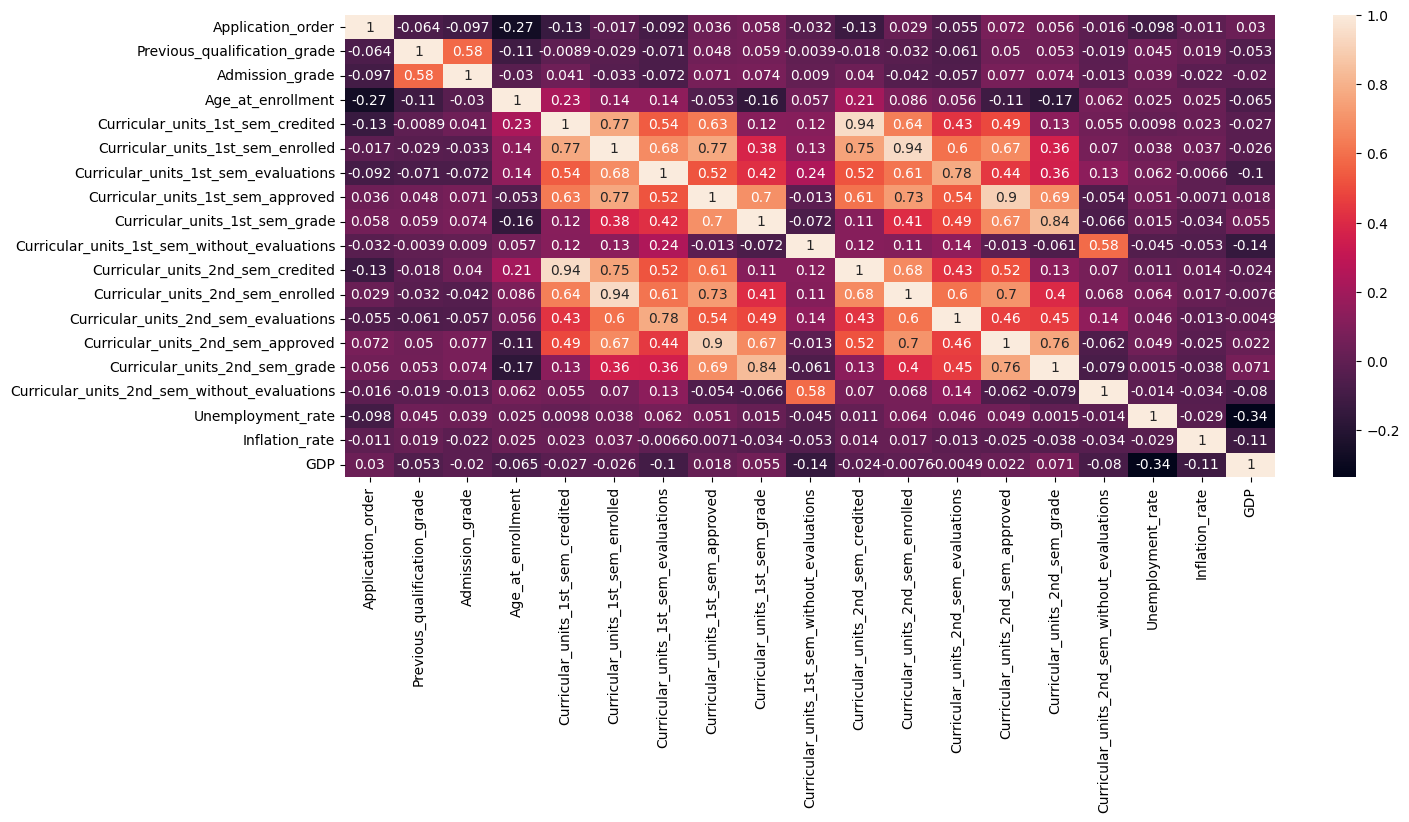

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(new_df[numerical_features].corr(), annot=True)
plt.show()

Dari grafik _heatmap_ di atas, dapat diketahui bahwa terdapat banyak fitur yang merupakan multikolinearitas. Fitur-fitur ini tentu akan membuat model kesulitan dalam menemukan keunikan dari tiap data karena data yang dipelajari adalah _data redundancy_ (data yang berulang). Oleh karena itu, fitur-fitur yang tergolong multikolinearitas ini akan dilakukan teknik **Principle Component Analysis (PCA)**.

In [17]:
prev_qualification_to_education_level = {
    "Pendidikan Sekunder": "Pendidikan Menengah",
    "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara": "Pendidikan Dasar",
    "Kursus Teknis Tinggi Profesional": "Pendidikan Teknis dan Profesional",
    "Kursus Spesialisasi Teknologi": "Pendidikan Teknis dan Profesional",
    "Tahun ke-11 sekolah - tidak selesai": "Pendidikan Menengah",
    "Pendidikan Tinggi - gelar": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar (Siklus 1)": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar sarjana": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar magister": "Pendidikan Tinggi",
    "Lainnya - Tahun ke-11 sekolah": "Pendidikan Menengah",
    "Pendidikan Tinggi - gelar magister (Siklus 2)": "Pendidikan Tinggi",
    "Tahun ke-10 sekolah - tidak selesai": "Pendidikan Menengah",
    "Frekuensi pendidikan tinggi": "Lainnya",
    "Tahun ke-12 sekolah - tidak selesai": "Pendidikan Menengah",
    "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara": "Pendidikan Dasar",
    "Pendidikan Tinggi - gelar doktor": "Pendidikan Tinggi",
    "Tahun ke-10 sekolah": "Pendidikan Menengah"
}

mother_qualification_to_education_level = {
    "Pendidikan Tinggi - gelar sarjana": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar (Siklus 1)": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar magister": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar magister (Siklus 2)": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar doktor": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar doktor (Siklus 3)": "Pendidikan Tinggi",
    "Frekuensi Pendidikan Tinggi": "Pendidikan Tinggi",
    "Tahun ke-7 (Lama)": "Pendidikan Dasar",
    "Tahun ke-7 sekolah": "Pendidikan Dasar",
    "Tahun ke-8 sekolah": "Pendidikan Dasar",
    "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara": "Pendidikan Dasar",
    "Tahun ke-9 sekolah - Tidak Selesai": "Pendidikan Dasar",
    "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara": "Pendidikan Dasar",
    "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara": "Pendidikan Dasar",
    "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara": "Pendidikan Menengah",
    "Tahun ke-12 sekolah - Tidak Selesai": "Pendidikan Menengah",
    "Tahun ke-11 sekolah - Tidak Selesai": "Pendidikan Menengah",
    "Lainnya - Tahun ke-11 sekolah": "Pendidikan Menengah",
    "Tahun ke-10 sekolah": "Pendidikan Menengah",
    "Kursus Perdagangan Umum": "Pendidikan Menengah",
    "Siklus 2 kursus SMA umum": "Pendidikan Menengah",
    "Kursus Teknis-Profesional": "Pendidikan Teknis dan Profesional",
    "Kursus Spesialisasi Teknologi": "Pendidikan Teknis dan Profesional",
    "Kursus Teknis Tinggi Profesional": "Pendidikan Teknis dan Profesional",
    "Kursus Studi Tinggi Khusus": "Pendidikan Teknis dan Profesional",
    "Tidak diketahui": "Lainnya",
    "Tidak bisa membaca atau menulis": "Lainnya",
    "Bisa membaca tanpa memiliki tahun ke-4 sekolah": "Lainnya"
}

father_qualification_to_education_level = {
    "Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara": "Pendidikan Dasar",
    "Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara": "Pendidikan Dasar",
    "Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara": "Pendidikan Dasar",
    "Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara": "Pendidikan Menengah",
    "Tahun ke-7 sekolah": "Pendidikan Menengah",
    "Tahun ke-8 sekolah": "Pendidikan Menengah",
    "Tahun ke-9 sekolah - Tidak Selesai": "Pendidikan Menengah",
    "Tahun ke-10 sekolah": "Pendidikan Menengah",
    "Tahun ke-11 sekolah - Tidak Selesai": "Pendidikan Menengah",
    "Tahun ke-12 sekolah - Tidak Selesai": "Pendidikan Menengah",
    "Lainnya - Tahun ke-11 sekolah": "Pendidikan Menengah",
    "Tahun ke-7 (Lama)": "Pendidikan Menengah",
    "Kursus SMA Komplementer": "Pendidikan Menengah",
    "Kursus SMA Komplementer - tidak selesai": "Pendidikan Menengah",
    "Kursus SMA komplementer tahun ke-2": "Pendidikan Menengah",
    "Siklus 2 kursus SMA umum": "Pendidikan Menengah",
    "Pendidikan Tinggi - gelar": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar sarjana": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar magister": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar magister (Siklus 2)": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar doktor": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar doktor (Siklus 3)": "Pendidikan Tinggi",
    "Pendidikan Tinggi - gelar (Siklus 1)": "Pendidikan Tinggi",
    "Kursus Spesialisasi Teknologi": "Pendidikan Teknis dan Profesional",
    "Kursus Studi Tinggi Khusus": "Pendidikan Teknis dan Profesional",
    "Kursus Teknis Tinggi Profesional": "Pendidikan Teknis dan Profesional",
    "Kursus Teknis-Profesional": "Pendidikan Teknis dan Profesional",
    "Kursus Perdagangan Umum": "Pendidikan Teknis dan Profesional",
    "Akuntansi Tambahan dan Administrasi": "Lainnya",
    "Umum Administrasi dan Kursus Perdagangan": "Lainnya",
    "Bisa membaca tanpa memiliki tahun ke-4 sekolah": "Lainnya",
    "Tidak bisa membaca atau menulis": "Lainnya",
    "Tidak diketahui": "Lainnya",
    "Frekuensi Pendidikan Tinggi": "Lainnya"
}

new_df["Previous_education_level"] = new_df["Previous_qualification"].map(prev_qualification_to_education_level)
new_df["Mothers_education_level"] = new_df["Mothers_qualification"].map(mother_qualification_to_education_level)
new_df["Fathers_education_level"] = new_df["Fathers_qualification"].map(father_qualification_to_education_level)

print(new_df["Previous_education_level"].unique())
print(new_df["Mothers_education_level"].unique())
print(new_df["Fathers_education_level"].unique())


['Pendidikan Menengah' 'Pendidikan Dasar'
 'Pendidikan Teknis dan Profesional' 'Pendidikan Tinggi' 'Lainnya']
['Pendidikan Dasar' 'Pendidikan Menengah' 'Pendidikan Tinggi'
 'Pendidikan Teknis dan Profesional' 'Lainnya']
['Pendidikan Menengah' 'Pendidikan Tinggi' 'Pendidikan Dasar' 'Lainnya'
 'Pendidikan Teknis dan Profesional']


In [18]:
mothers_occupation_dict = {
    "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan":"Bidang Pertanian, Perikanan, dan Kehutanan", 
    "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan":"Bidang Pertanian, Perikanan, dan Kehutanan",
    "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin":"Bidang Industri dan Kerajinan", 
    "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya":"Bidang Industri dan Kerajinan",
    "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik":"Bidang Industri dan Kerajinan",
    "Tenaga kerja terampil dalam percetakan, pembuatan instrumen presisi, perhiasan, pengrajin, dan sejenisnya":"Bidang Industri dan Kerajinan",
    "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi":"Bidang Industri dan Kerajinan",
    "Tenaga Kerja Terampil":"Bidang Industri dan Kerajinan",
    "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual":"Bidang Layanan",
    "Penjual":"Bidang Layanan", 
    "Pekerja pembersihan":"Bidang Layanan",
    "Pekerja layanan personal":"Bidang Layanan",
    "Asisten persiapan makanan":"Bidang Layanan",
    "Pekerja perawatan pribadi dan sejenisnya":"Bidang Layanan",
    "Profesi Angkatan Bersenjata":"Bidang Profesi", 
    "Spesialis dalam Aktivitas Intelektual dan Ilmiah":"Bidang Profesi", 
    "Spesialis dalam teknologi informasi dan komunikasi (TIK)":"Bidang Profesi",
    "Profesional Kesehatan":"Bidang Profesi",
    "Teknisi dan Profesi Tingkat Menengah":"Bidang Profesi",
    "Teknisi dan Profesional, tingkat menengah dari kesehatan":"Bidang Profesi",
    "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya":"Bidang Profesi",
    "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik":"Bidang Profesi",
    "Guru":"Bidang Profesi",
    "Staf Administrasi":"Bidang Lainnya",
    "Staf dukungan administratif lainnya":"Bidang Lainnya",
    "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur":"Bidang Lainnya",
    "Operator Pemasangan dan Mesin serta Pekerja Perakitan":"Bidang Lainnya",
    "Pekerja kantor, sekretaris umum, dan operator pengolahan data":"Bidang Lainnya",
    "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi":"Bidang Lainnya",
    "Siswa":"Bidang Lainnya",
    "Situasi Lainnya":"Bidang Lainnya",
    "(kosong)":"Bidang Lainnya"
}

fathers_occupation_dict = {
    "Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan":"Bidang Pertanian, Perikanan, dan Kehutanan", 
    "Petani berorientasi pasar dan tenaga kerja pertanian terampil dan produksi hewan":"Bidang Pertanian, Perikanan, dan Kehutanan",
    "Petani, pemelihara hewan, nelayan, pemburu, dan pengumpul, untuk pemenuhan kebutuhan":"Bidang Pertanian, Perikanan, dan Kehutanan",
    "Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan":"Bidang Pertanian, Perikanan, dan Kehutanan",
     "Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin":"Bidang Industri dan Kerajinan", 
    "Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya":"Bidang Industri dan Kerajinan",
    "Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik":"Bidang Industri dan Kerajinan",
    "Tenaga kerja terampil dalam logamurgi, permesinan logam, dan sejenisnya":"Bidang Industri dan Kerajinan",
    "Tenaga kerja terampil dalam listrik dan elektronika":"Bidang Industri dan Kerajinan",
    "Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi":"Bidang Industri dan Kerajinan",
    "Tenaga Kerja Terampil":"Bidang Industri dan Kerajinan",
     "Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual":"Bidang Layanan", 
    "Penjual":"Bidang Layanan",
    "Pedagang jalanan (kecuali makanan) dan penyedia layanan jalanan":"Bidang Layanan",
    "Pekerja layanan personal":"Bidang Layanan",
    "Pekerja perawatan pribadi dan sejenisnya":"Bidang Layanan",
    "Personil layanan perlindungan dan keamanan":"Bidang Layanan",
    "Profesi Angkatan Bersenjata":"Bidang Profesi",
    "Sersan Angkatan Bersenjata":"Bidang Profesi",
    "Perwira Angkatan Bersenjata":"Bidang Profesi",
    "Personel Angkatan Bersenjata Lainnya":"Bidang Profesi",
    "Spesialis dalam Aktivitas Intelektual dan Ilmiah":"Bidang Profesi",
    "Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait":"Bidang Profesi",
    "Spesialis dalam keuangan, akuntansi, organisasi administratif, hubungan publik, dan komersial":"Bidang Profesi",
    "Profesional Kesehatan":"Bidang Profesi",
    "Teknisi dan Profesi Tingkat Menengah":"Bidang Profesi",
    "Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik":"Bidang Profesi",
    "Teknisi dan Profesional, tingkat menengah dari kesehatan":"Bidang Profesi",
    "Teknisi Teknologi Informasi dan Komunikasi":"Bidang Profesi",
    "Guru":"Bidang Profesi",
    "Direktur Layanan Administratif dan Komersial":"Bidang Profesi",
    "Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya":"Bidang Profesi",
    "Direktur Hotel, Restoran, Perdagangan, dan Layanan Lainnya":"Bidang Profesi",
     "Staf Administrasi":"Bidang Lainnya", 
    "Staf dukungan administratif lainnya":"Bidang Lainnya",
    "Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur":"Bidang Lainnya",
    "Operator Pemasangan dan Mesin serta Pekerja Perakitan":"Bidang Lainnya",
    "Operator pabrik dan mesin tetap":"Bidang Lainnya",
    "Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi":"Bidang Lainnya",
    "Pekerja kantor, sekretaris umum, dan operator pengolahan data":"Bidang Lainnya",
    "Asisten persiapan makanan":"Bidang Lainnya",
    "Pengemudi kendaraan dan operator peralatan mobile":"Bidang Lainnya",
    "Pekerja perakitan":"Bidang Lainnya",
    "Siswa":"Bidang Lainnya",
    "Situasi Lainnya":"Bidang Lainnya",
    "(kosong)":"Bidang Lainnya"
}

new_df["Mothers_occupation_field"] = new_df["Mothers_occupation"].map(mothers_occupation_dict)
new_df["Fathers_occupation_field"] = new_df["Fathers_occupation"].map(fathers_occupation_dict)

print(sorted(new_df["Mothers_occupation_field"].unique()))
print(sorted(new_df["Fathers_occupation_field"].unique()))

['Bidang Industri dan Kerajinan', 'Bidang Lainnya', 'Bidang Layanan', 'Bidang Pertanian, Perikanan, dan Kehutanan', 'Bidang Profesi']
['Bidang Industri dan Kerajinan', 'Bidang Lainnya', 'Bidang Layanan', 'Bidang Pertanian, Perikanan, dan Kehutanan', 'Bidang Profesi']


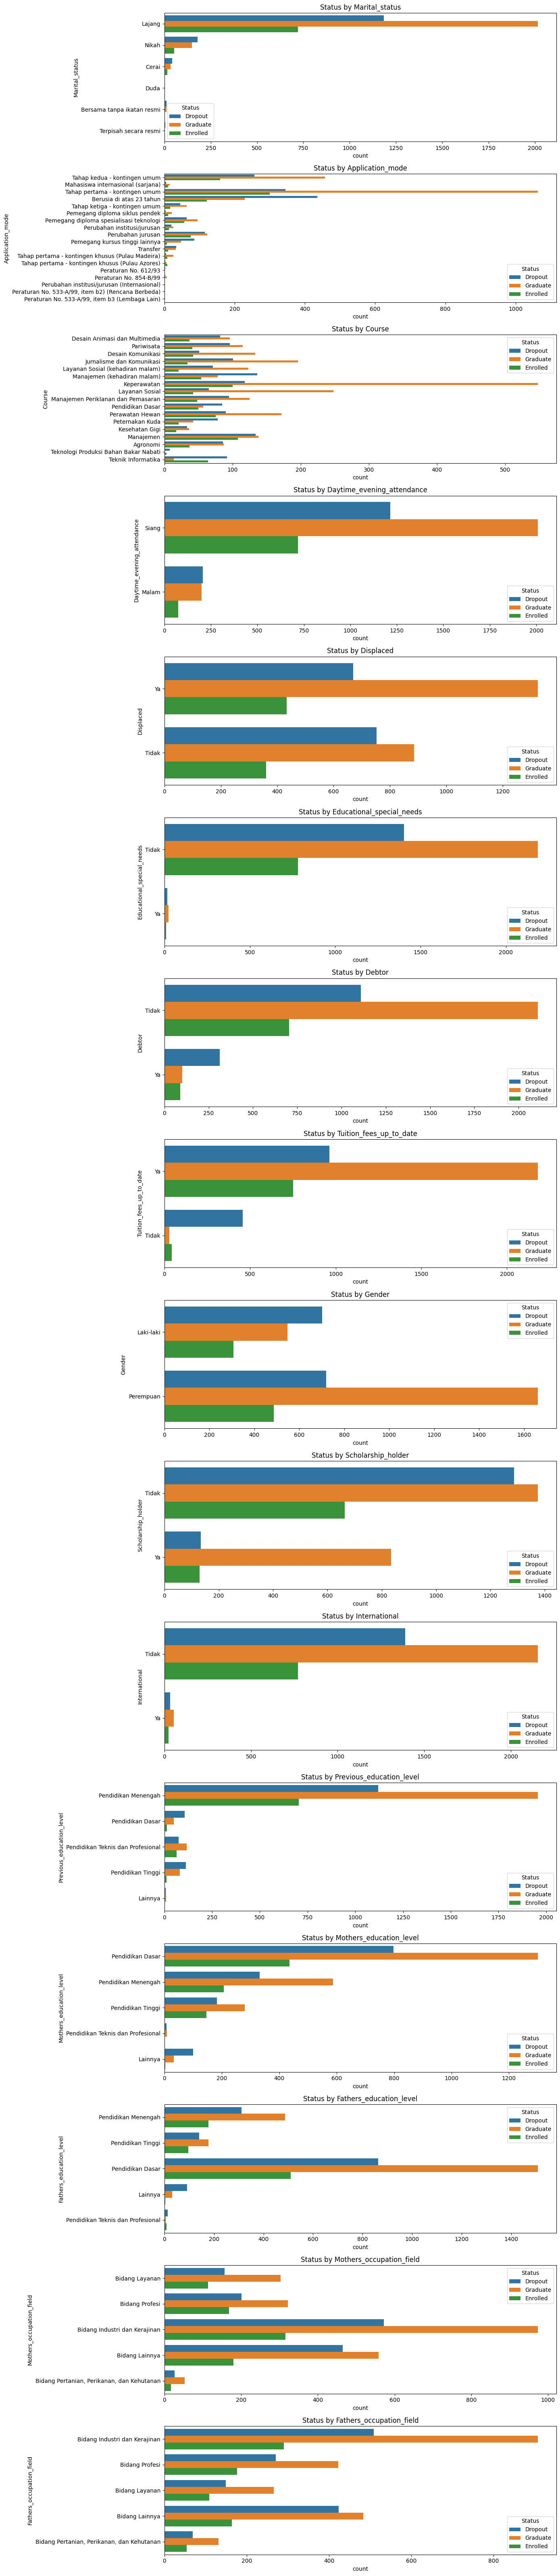

In [19]:
categorical_features.remove("Previous_qualification")
categorical_features.remove("Mothers_qualification")
categorical_features.remove("Fathers_qualification")
categorical_features.remove("Mothers_occupation")
categorical_features.remove("Fathers_occupation")
categorical_features.remove("Nacionality")
categorical_features.append("Previous_education_level")
categorical_features.append("Mothers_education_level")
categorical_features.append("Fathers_education_level")
categorical_features.append("Mothers_occupation_field")
categorical_features.append("Fathers_occupation_field")

categorical_plot(new_df, categorical_features, segment_type="Status")

Terdapat beberapa pola menarik dari visualisasi berdasarkan kategori yang ada yang berdampak pada lulus tidaknya siswa. Berikut pola yang ditemukan dari visualisasi di atas:

- Siswa yang telah menikah lebih cenderung _dropout_ daripada siswa yang masih lajang
- Siswa yang masuk perguruan tinggi melalui jalur "Berusia di atas 23 tahun" dan "Pemegang kursus tinggi lainnya" memiliki jumlah siswa _dropout_ yang lebih banyak. Hal ini bisa saja disebabkan karena hilangnya motivasi untuk belajar di saat bertambahnya usia dan lebih mementingkan untuk berkarir.
- Siswa yang kursusnya manajemen, pendidikan dasar, peternakan kuda, dan teknik informatika memiliki jumlah siswa _dropout_ yang lebih tinggi. Kemudian untuk kursus teknologi produksi bahan bakar nabati, sangat sedikit siswa yang memilih kursus ini dan jumlah siswa yang lulus bahkan mendekati 0.
- Rasio siswa yang lulus yang kelasnya di siang hari cenderung lebih tinggi daripada rasio kelulusan yang kelas malam.
- Siswa yang merupakan peminjam/pengutang lebih cenderung untuk _dropout_.
- Siswa yang biaya pendidikannya belum terbayar cenderung untuk _dropout_.
- Siswa laki-laki memiliki rasio _dropout_ yang lebih tinggi daripada siswa perempuan.
- Siswa yang memiliki beasiswa memiliki rasio kelulusan yang cukup tinggi dibandingkan dengan siswa yang tidak memiliki beasiswa.

Selanjutnya untuk lebih menyederhanakan data yang ada, akan dilakukan eliminasi pada beberapa fitur kategoris ini. Fitur-fitur tersebut adalah `Marital_status`, `Application_mode`, `Educational_special_needs`, `International`, `Previous_education_level`, `Mothers_education_level`, `Fathers_education_level`, `Mothers_occupation_field`, dan `Fathers_occupation_field`. Fitur-fitur tersebut akan dieliminasi karena data yang dimiliki memiliki jumlah ragam nilai yang banyak ataupun persebaran datanya sangat tidak seimbang.

## Data Preparation / Preprocessing

Buat sebuah folder baru dengan nama "assets" yang akan digunakan untuk menyimpan berkas-berkas penting seperti model, PCA, maupun PowerTransformer.

In [20]:
try:
    os.mkdir("assets")
except:
    print("This folder has already exist")

This folder has already exist


Seperti yang dijelaskan sebelumnya bahwa persebaran data pada tiap status tidak merata. Oleh karena itu, tahapan pertama dari _preprocessing_ ini adalah menyeimbangkan persebaran data pada tiap status.

In [21]:
from sklearn.utils import resample, shuffle

graduate_status_df = new_df[new_df["Status"]=="Graduate"].copy()
dropout_status_df = new_df[new_df["Status"]=="Dropout"].copy()
enrolled_status_df = new_df[new_df["Status"]=="Enrolled"].copy()

# Undersampling
graduate_status_undersampled_df = resample(graduate_status_df, n_samples=len(dropout_status_df), random_state=123)

# Oversampling
enrolled_status_oversampled_df = resample(enrolled_status_df, n_samples=len(dropout_status_df), random_state=123)


concated_df = pd.concat([graduate_status_undersampled_df,
                         dropout_status_df,
                         enrolled_status_oversampled_df]).reset_index(drop=True)
concated_df = shuffle(concated_df, random_state=123)
concated_df.reset_index(drop=True, inplace=True)
concated_df.Status.value_counts()

Status
Graduate    1421
Dropout     1421
Enrolled    1421
Name: count, dtype: int64

Persebaran datanya pada tiap status sudah seimbang.

In [22]:
import numpy as np
id_values = np.array(range(len(concated_df)))

main_df = concated_df.copy()
main_df["ID"] = id_values.astype(int)
main_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Previous_education_level,Mothers_education_level,Fathers_education_level,Mothers_occupation_field,Fathers_occupation_field,ID
0,Lajang,Tahap pertama - kontingen umum,2,Keperawatan,Siang,Pendidikan Sekunder,112.0,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Staf Administrasi,Tenaga Kerja Terampil,106.8,Ya,Tidak,Tidak,Ya,Perempuan,Ya,19,Tidak,0,7,8,6,13.533333,0,0,8,9,7,13.614286,0,12.4,0.5,1.79,Graduate,Pendidikan Menengah,Pendidikan Menengah,Pendidikan Dasar,Bidang Lainnya,Bidang Industri dan Kerajinan,0
1,Lajang,Tahap pertama - kontingen umum,1,Teknik Informatika,Siang,Pendidikan Sekunder,129.0,Portugis,Lainnya - Tahun ke-11 sekolah,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Staf Administrasi,Profesi Angkatan Bersenjata,124.1,Ya,Tidak,Tidak,Ya,Laki-laki,Tidak,19,Tidak,0,5,10,0,0.000000,0,0,5,10,1,14.000000,3,7.6,2.6,0.32,Dropout,Pendidikan Menengah,Pendidikan Menengah,Pendidikan Menengah,Bidang Lainnya,Bidang Profesi,1
2,Lajang,Perubahan jurusan,1,Manajemen,Siang,Pendidikan Sekunder,123.0,Portugis,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Pendidikan Sekunder - Tahun ke-12 sekolah atau...,Staf Administrasi,Staf Administrasi,114.4,Tidak,Tidak,Tidak,Ya,Laki-laki,Tidak,22,Tidak,0,5,6,0,0.000000,0,0,5,8,2,11.500000,0,15.5,2.8,-4.06,Dropout,Pendidikan Menengah,Pendidikan Menengah,Pendidikan Menengah,Bidang Lainnya,Bidang Lainnya,2
3,Lajang,Perubahan jurusan,1,Manajemen Periklanan dan Pemasaran,Siang,Pendidikan Sekunder,132.0,Portugis,Pendidikan Tinggi - gelar,Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) a...,Staf Administrasi,Operator Pemasangan dan Mesin serta Pekerja Pe...,120.5,Tidak,Tidak,Tidak,Ya,Laki-laki,Tidak,19,Tidak,0,6,17,4,12.500000,0,0,6,8,4,13.250000,0,13.9,-0.3,0.79,Enrolled,Pendidikan Menengah,Pendidikan Tinggi,Pendidikan Dasar,Bidang Lainnya,Bidang Lainnya,3
4,Lajang,Berusia di atas 23 tahun,1,Keperawatan,Siang,Pendidikan Sekunder,120.0,Portugis,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau ...,Tenaga Kerja Terampil,Tenaga Kerja Terampil,100.0,Tidak,Tidak,Tidak,Ya,Laki-laki,Tidak,34,Tidak,0,7,15,6,11.333333,0,0,7,16,4,12.600000,0,16.2,0.3,-0.92,Enrolled,Pendidikan Menengah,Pendidikan Dasar,Pendidikan Dasar,Bidang Industri dan Kerajinan,Bidang Industri dan Kerajinan,4


Pada program di atas, ditambahkan sebuah fitur baru dengan nama `ID`. Fitur ini nantinya akan berguna untuk menggabungkan tabel yang hanya memiliki fitur kategorik dan tabel yang hannya memiliki fitur numerik yang masing-masing telah dilakukan _preprocessing_.

Berdasarkan hasil eksplorasi sebelumnya, terdapat beberapa fitur numerik yang tidak akan digunakan dalam melatih model. Pada tahapan _preprocessing_ ini, fitur-fitur tersebut akan dieliminasi.

In [23]:
numerical_list = numerical_features.copy()
numerical_list.append("ID")

numerical_df = main_df[numerical_list].copy()
numerical_df.drop(["Application_order",
                   "Previous_qualification_grade",
                   "Curricular_units_1st_sem_credited",
                   "Curricular_units_1st_sem_without_evaluations",
                   "Curricular_units_2nd_sem_credited",
                   "Curricular_units_2nd_sem_without_evaluations",
                   "Inflation_rate",
                   "GDP",
                   "Unemployment_rate"], axis=1, inplace=True)
numerical_df.head()

,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,ID
0,106.8,19,7,8,6,13.533333,8,9,7,13.614286,0
1,124.1,19,5,10,0,0.000000,5,10,1,14.000000,1
2,114.4,22,5,6,0,0.000000,5,8,2,11.500000,2
3,120.5,19,6,17,4,12.500000,6,8,4,13.250000,3
4,100.0,34,7,15,6,11.333333,7,16,4,12.600000,4


In [24]:
categorical_list = categorical_features.copy()
categorical_list.append("ID")

categorical_df = main_df[categorical_list].copy()
categorical_df.drop([
    "Marital_status",
    "Application_mode",
    "Course",
    "Educational_special_needs",
    "International",
    "Previous_education_level",
    "Mothers_education_level",
    "Fathers_education_level",
    "Mothers_occupation_field",
    "Fathers_occupation_field"], axis=1, inplace=True)

categorical_df.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,ID
0,Siang,Ya,Tidak,Ya,Perempuan,Ya,0
1,Siang,Ya,Tidak,Ya,Laki-laki,Tidak,1
2,Siang,Tidak,Tidak,Ya,Laki-laki,Tidak,2
3,Siang,Tidak,Tidak,Ya,Laki-laki,Tidak,3
4,Siang,Tidak,Tidak,Ya,Laki-laki,Tidak,4


Setelah selesai memisahkan antara tabel yang memiliki fitur kategorik dan tabel yang memiliki fitur numerik, saatnya melakukan _preprocessing_ pada tiap tabel tersebut. Untuk tabel numerik akan dilakukan normalisasi menggunakan metode **PowerTransformer**. Sedangkan pada tabel kategorik akan dilakukan teknik **One-hot Encoding**.

### Numerical Features's Table

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
import joblib

#### PCA

In [26]:
pca_features1 = [
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved', 
    'Curricular_units_2nd_sem_grade'
]

pca_features2 =  ['Curricular_units_1st_sem_evaluations','Curricular_units_2nd_sem_evaluations']

In [27]:
pca1 = PCA(n_components=len(pca_features1), random_state=42)
pca1.fit(numerical_df[pca_features1])
pca1.explained_variance_ratio_

array([0.77113233, 0.12801851, 0.06178194, 0.02635175, 0.0099951 ,
       0.00272036])

In [28]:
pca1 = PCA(n_components=2, random_state=42)
pca1.fit(numerical_df[pca_features1])
numerical_df[["pca1_1","pca1_2"]] = pca1.transform(numerical_df[pca_features1])
numerical_df.drop(pca_features1, axis=1, inplace=True)
joblib.dump(pca1, "assets/enroll_approve_grade_1st_2nd")
numerical_df.head()

,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_evaluations,Curricular_units_2nd_sem_evaluations,ID,pca1_1,pca1_2
0,106.8,19,8,9,0,6.101793,0.780672
1,124.1,19,10,10,1,-6.165937,-2.251429
2,114.4,22,6,8,2,-7.441624,-1.079950
3,120.5,19,17,8,3,3.213084,-2.042569
4,100.0,34,15,16,4,3.067882,0.351781


In [29]:
pca2 = PCA(n_components=len(pca_features2), random_state=75)
pca2.fit(numerical_df[pca_features2])
pca2.explained_variance_ratio_

array([0.879709, 0.120291])

In [30]:
pca2 = PCA(n_components=1, random_state=75)
pca2.fit(numerical_df[pca_features2])
numerical_df["pca2"] = pca2.transform(numerical_df[pca_features2])
numerical_df.drop(pca_features2, axis=1, inplace=True)
joblib.dump(pca2, "assets/eval_1st_2nd")
numerical_df.head()

,Admission_grade,Age_at_enrollment,ID,pca1_1,pca1_2,pca2
0,106.8,19,0,6.101793,0.780672,0.261519
1,124.1,19,1,-6.165937,-2.251429,2.392371
2,114.4,22,2,-7.441624,-1.079950,-1.869333
3,120.5,19,3,3.213084,-2.042569,6.015165
4,100.0,34,4,3.067882,0.351781,10.160076


#### Power Transformer

In [31]:
def power_transformers(df, features):
    transformed_features_list = []
    transformed_df = df.copy()
    for feature in features:
        transformer = PowerTransformer()
        y = np.array(transformed_df[feature])
        y = y.reshape(-1,1)
        transformer.fit(y)
        transformed_df[f"Transformed_{feature}"] = np.round(transformer.transform(y), 3)
        transformed_df.drop(feature, axis=1, inplace=True)
        joblib.dump(transformer, f"assets/Transformed_{feature}")
        transformed_features_list.append(f"Transformed_{feature}")
    return transformed_df, transformed_features_list

In [32]:
features_to_transformed = [
    "Admission_grade",
    "Age_at_enrollment",
    "pca1_1",
    "pca1_2",
    "pca2"
]

In [33]:
numerical_preprocessed_df, list_ = power_transformers(numerical_df, features_to_transformed)
numerical_preprocessed_df

,ID,Transformed_Admission_grade,Transformed_Age_at_enrollment,Transformed_pca1_1,Transformed_pca1_2,Transformed_pca2
0,0,-1.443,-0.683,0.965,0.543,0.063
1,1,-0.082,-0.683,-1.016,-0.819,0.452
2,2,-0.811,0.319,-1.101,-0.180,-0.334
3,3,-0.343,-0.683,0.186,-0.697,1.105
4,4,-2.062,1.568,0.151,0.411,1.845
...,...,...,...,...,...,...
4258,4258,-0.763,-0.278,-1.540,1.139,-2.222
4259,4259,0.059,-1.189,-0.983,-0.168,-0.338
4260,4260,-0.269,0.050,0.363,-0.606,-0.327
4261,4261,1.699,0.319,0.630,-1.238,-0.200


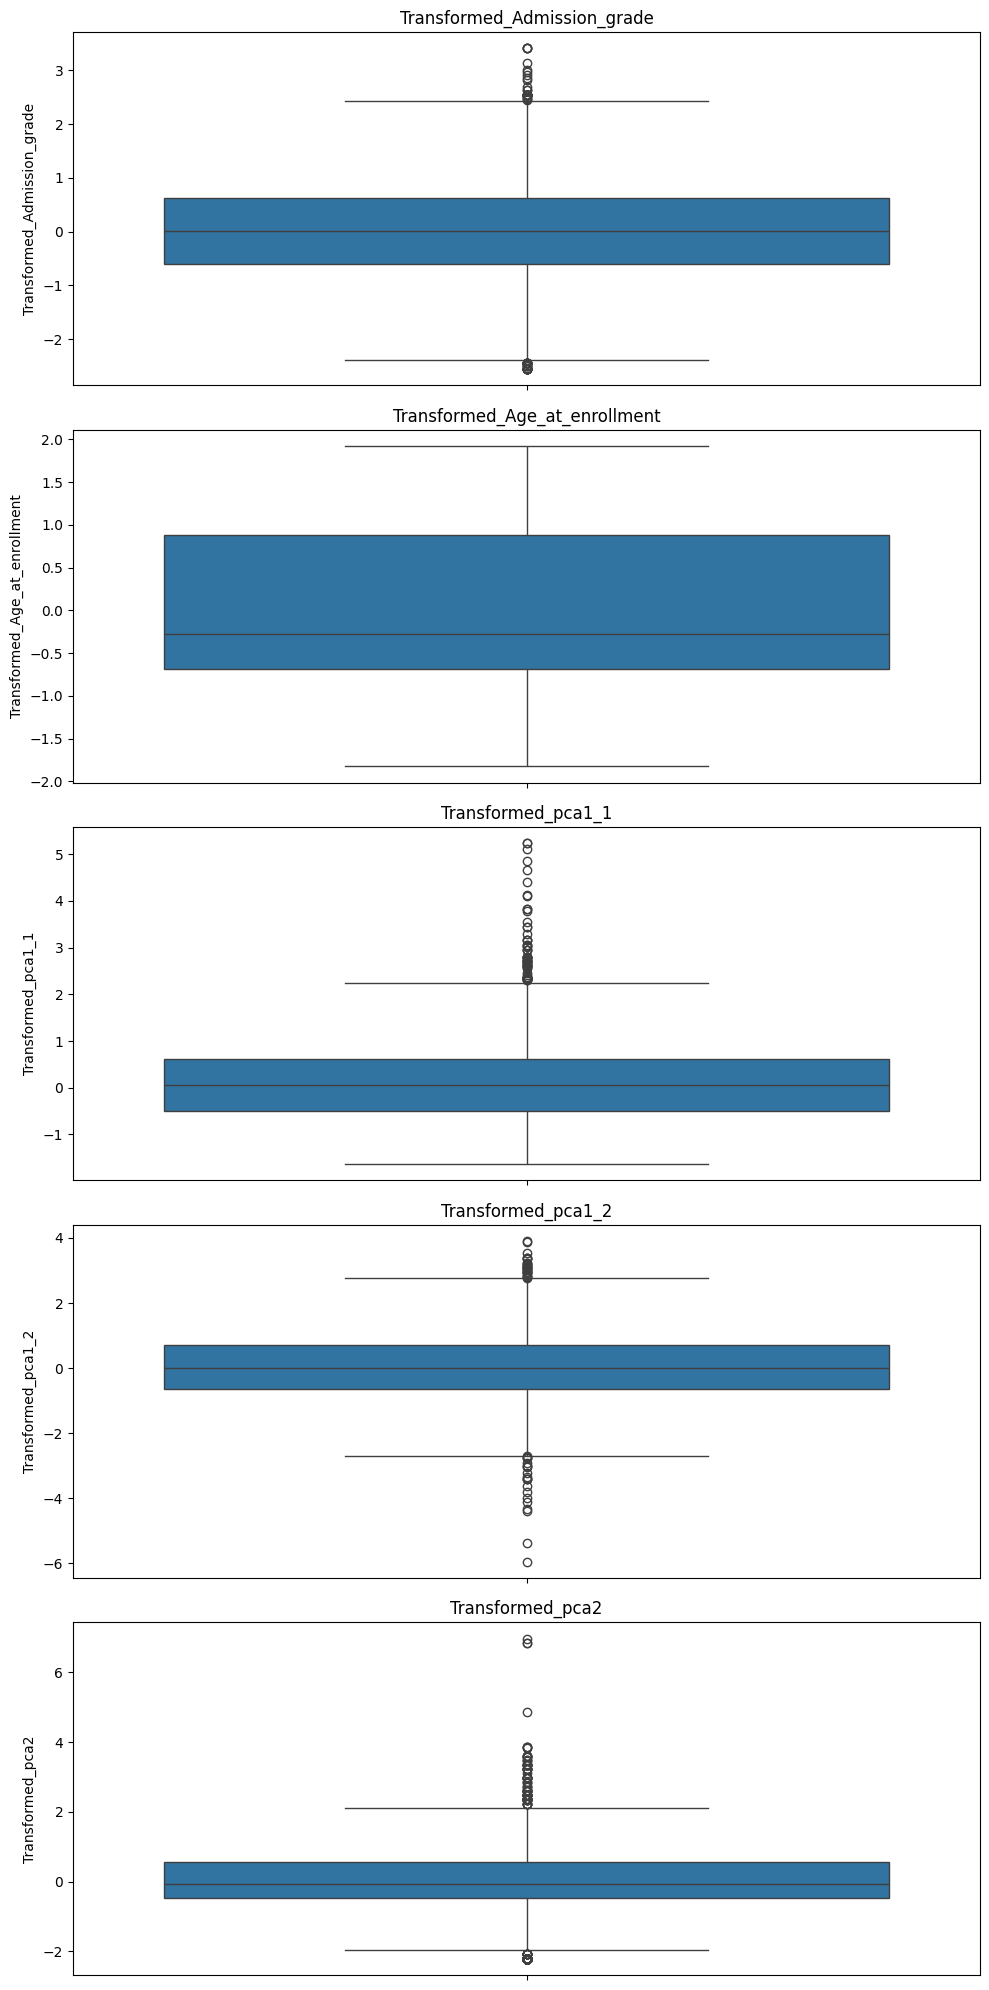

In [34]:
numerical_dis_plot(numerical_preprocessed_df, list_)

### Categorical Features's Table

In [35]:
categorical_dummies_df = pd.get_dummies(categorical_df, dtype="int")
categorical_dummies_df.head()

,ID,Daytime_evening_attendance_Malam,Daytime_evening_attendance_Siang,Displaced_Tidak,Displaced_Ya,Debtor_Tidak,Debtor_Ya,Tuition_fees_up_to_date_Tidak,Tuition_fees_up_to_date_Ya,Gender_Laki-laki,Gender_Perempuan,Scholarship_holder_Tidak,Scholarship_holder_Ya
0,0,0,1,0,1,1,0,0,1,0,1,0,1
1,1,0,1,0,1,1,0,0,1,1,0,1,0
2,2,0,1,1,0,1,0,0,1,1,0,1,0
3,3,0,1,1,0,1,0,0,1,1,0,1,0
4,4,0,1,1,0,1,0,0,1,1,0,1,0


### Merge All Tables

In [36]:
merged1_df = pd.merge(main_df[["ID","Status"]], numerical_preprocessed_df, on="ID")
merged2_df = pd.merge(merged1_df, categorical_dummies_df, on="ID")
final_data = merged2_df.copy()
final_data.drop("ID", axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Status                            4263 non-null   object 
 1   Transformed_Admission_grade       4263 non-null   float64
 2   Transformed_Age_at_enrollment     4263 non-null   float64
 3   Transformed_pca1_1                4263 non-null   float64
 4   Transformed_pca1_2                4263 non-null   float64
 5   Transformed_pca2                  4263 non-null   float64
 6   Daytime_evening_attendance_Malam  4263 non-null   int32  
 7   Daytime_evening_attendance_Siang  4263 non-null   int32  
 8   Displaced_Tidak                   4263 non-null   int32  
 9   Displaced_Ya                      4263 non-null   int32  
 10  Debtor_Tidak                      4263 non-null   int32  
 11  Debtor_Ya                         4263 non-null   int32  
 12  Tuitio

Setelah dilakukan tahapan _preprocessing_ pada kedua tabel (numerik dan kategorik) dan digabungkan kembali, saatnya menggunakan data tersebut untuk melatih model. Sebelum itu, kita perlu memisahkan antara kriteria dengan target.

In [37]:
from sklearn.model_selection import train_test_split

X = final_data.drop("Status", axis=1)
y = final_data["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)

X_train.shape, X_test.shape

((3197, 17), (1066, 17))

In [38]:
y_test.value_counts()

Status
Graduate    356
Enrolled    355
Dropout     355
Name: count, dtype: int64

## Modeling

Karena data yang digunakan untuk melatih model masih memiliki skala data yang cukup beragam, maka model yang akan digunakan adalah model yang tidak sensitif terhadap perbedaan skala data. Model-model tersebut adalah **Decision-Trees**, **Random Forest**, dan **Gradient Boosting**.

### Decision-Trees Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
 
tree_model = DecisionTreeClassifier(random_state=123)
 
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)


C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [40]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt'}


In [41]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy', 
    max_depth=30, 
    max_features='sqrt'
)
 
tree_model.fit(X_train, y_train)
joblib.dump(tree_model, "assets/tree_model.joblib")

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       random_state=123)

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
 
RFmodel = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30],
    'criterion' :['gini', 'entropy']
}
 
CV_RFmodel = GridSearchCV(estimator=RFmodel, param_grid=param_grid, cv=5, n_jobs=-1)
CV_RFmodel.fit(X_train, y_train)

C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Norman Dwi Febrio\anaconda3\envs\proyek-akhir-bpds\lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [43]:
CV_RFmodel.best_params_ 

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [44]:
RFmodel = RandomForestClassifier(
    random_state=123, 
    max_depth=20, 
    n_estimators=200, 
    max_features='sqrt', 
    criterion='entropy', 
    n_jobs=-1
)
RFmodel.fit(X_train, y_train)
joblib.dump(RFmodel, "assets/rf_model.joblib")

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                       n_jobs=-1, random_state=123)

### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
 
gboost_model = GradientBoostingClassifier(random_state=123)
 
param_grid = {
    'max_depth': [15, 20],
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}
 
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(X_train, y_train)

In [47]:
CV_gboost.best_params_

In [48]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.05, 
    max_depth=15, 
    max_features='sqrt',
    n_estimators=300,
    n_iter_no_change=20,
    validation_fraction=0.1
)

gboost_model.fit(X_train, y_train)
joblib.dump(gboost_model, "assets/gboost_model.joblib")

GradientBoostingClassifier(learning_rate=0.05, max_depth=15,
                           max_features='sqrt', n_estimators=300,
                           n_iter_no_change=20, random_state=123)

## Evaluation

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
 
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

### Decision-Trees Classifier

In [50]:
y_pred_test = tree_model.predict(X_test)

              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       355
    Enrolled       0.75      0.86      0.80       355
    Graduate       0.80      0.80      0.80       356

    accuracy                           0.78      1066
   macro avg       0.79      0.78      0.78      1066
weighted avg       0.79      0.78      0.78      1066



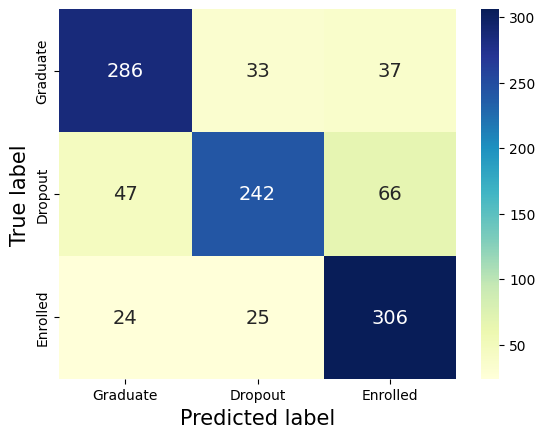

In [51]:
evaluating(y_pred=y_pred_test, y_true=y_test)

### Random Forest Classifier

In [52]:
y_pred_test = RFmodel.predict(X_test)

              precision    recall  f1-score   support

     Dropout       0.89      0.73      0.80       355
    Enrolled       0.78      0.88      0.83       355
    Graduate       0.84      0.87      0.85       356

    accuracy                           0.83      1066
   macro avg       0.83      0.83      0.83      1066
weighted avg       0.83      0.83      0.83      1066



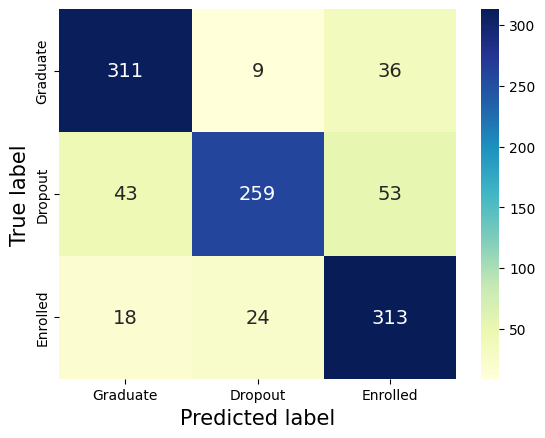

In [53]:
evaluating(y_pred=y_pred_test, y_true=y_test)

### Gradient Boosting

In [54]:
y_pred_test = gboost_model.predict(X_test)

              precision    recall  f1-score   support

     Dropout       0.87      0.73      0.79       355
    Enrolled       0.76      0.85      0.81       355
    Graduate       0.82      0.86      0.84       356

    accuracy                           0.81      1066
   macro avg       0.82      0.81      0.81      1066
weighted avg       0.82      0.81      0.81      1066



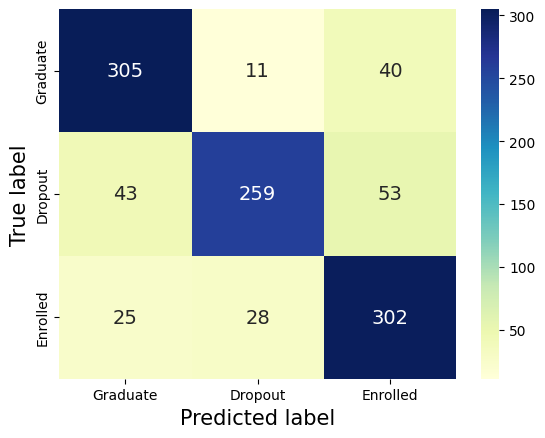

In [55]:
evaluating(y_pred=y_pred_test, y_true=y_test)

Berdasarkan hasil visualisasi di atas, sebenarnya tidak ada model yang cukup akurat untuk memprediksi apakah siswa itu akan _graduate_, _dropout_, ataupun _enrolled_. Bahkan, ketiga model tersebut masih banyak yang mengklasifikasikan siswa yang sebenarnya _dropout_ sebagai siswa yang _graduate_. Tentu ini akan cukup berimbas pada kesalahan tindakan yang akan dilakukan jika siswa yang sebenarnya _dropout_ namun malah diklasifikasikan sebagai siswa yang _graduate_. 

Meskipun demikian, kita masih tetap perlu memilih satu di antara ketiga model tersebut. Secara keseluruhan, model **Random Forest** memiliki performa yang lebih baik daripada kedua model lainnya. Oleh karena itu, model inilah yang akan digunakan untuk memprediksi status siswa.